# 서로소 집함
---

- 서로소 집합이란 공통 원소가 없는 두 집합을 의미한다.



## 서로소 집합 자료구조

- 서로소 부분 집합들로 나누어진 원소들의 데이터를 처리하기 위한 자료구조이다.


- 서로소 집합 자료구조는 두 종류의 연산을 지원한다.
    - 합집합(Union): 두 개의 원소가 포합된 집합을 하나의 집합으로 합치는 연산
    - 찾기(Find): 특정한 원소가 속한 집합이 어떤 집합인지 알려주는 연산
    

- 서로소 집합 자료구조는 **합치기 찾기(Union Find) 자료구조**라고 불리기도 한다.

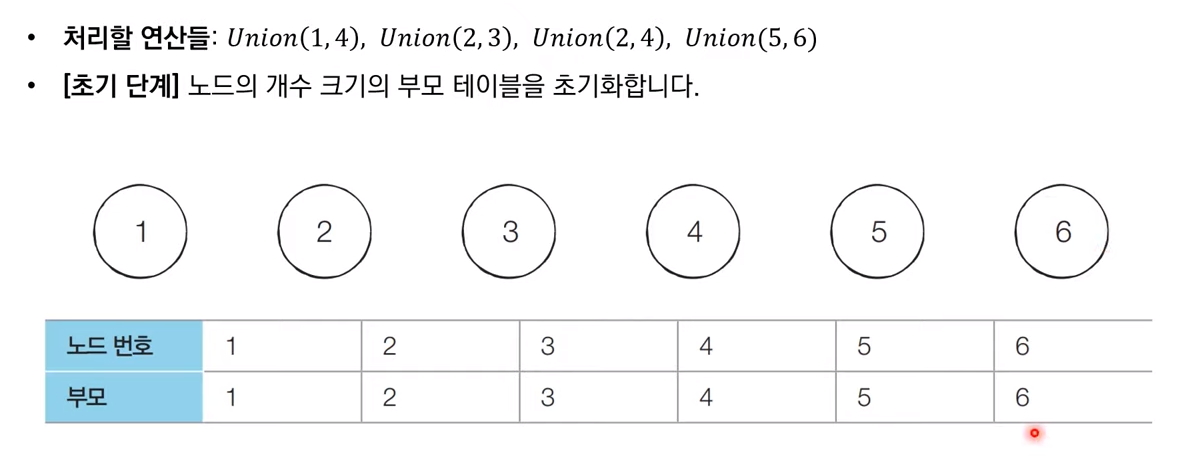

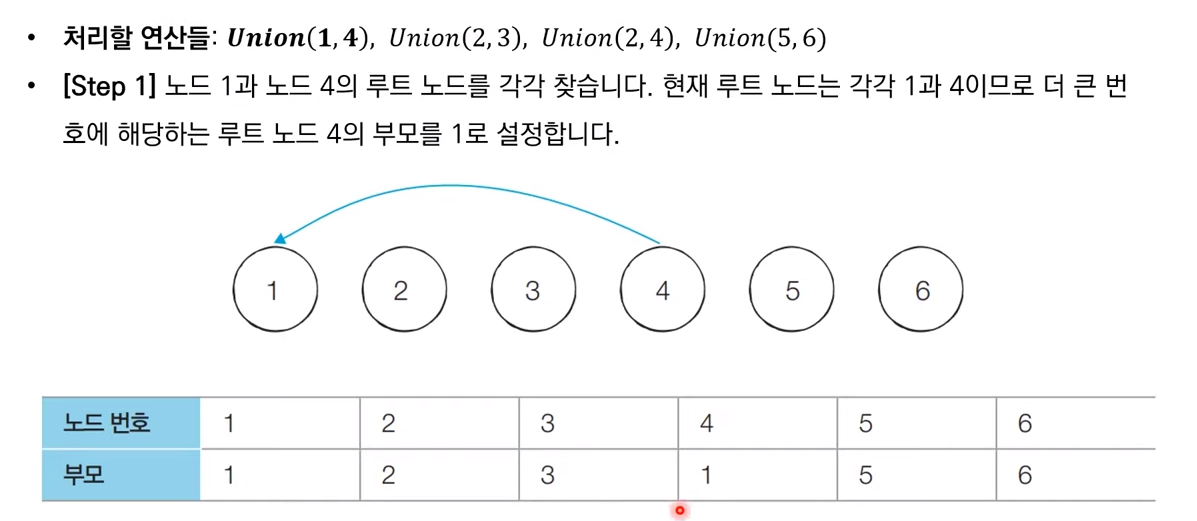

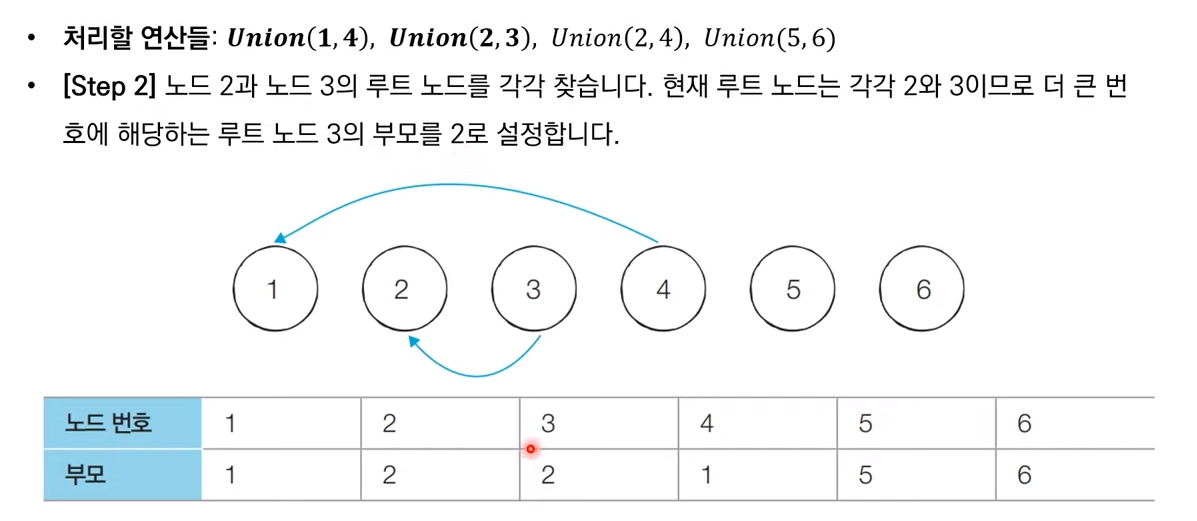

### Union(2, 4), Union(5, 6)을 마찬가지로 더 큰 루트 노드의 번호를 부모 노드 테이블에 업데이트를 해준다.

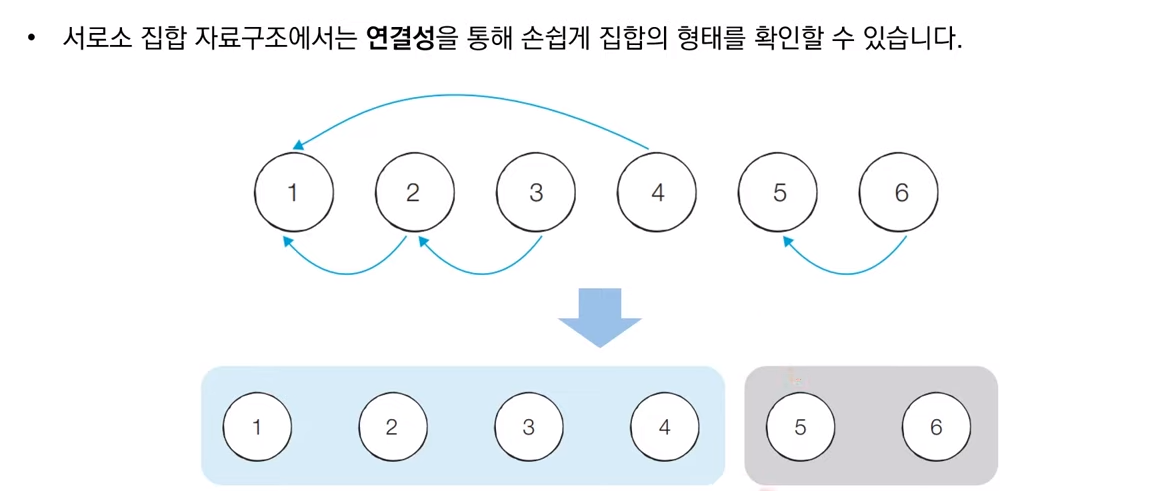

## 기본적인 구현 방법

In [1]:
def find_parent(parent, x):
    if parent[x] != x:
        return find_parent(parent, parent[x])
    return x

def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

# 노드의 개수
v = 6

parent = [0] * (v + 1) # 부모 테이블 초기화

# 유니온 실행할 리스트
unions = [(1, 4), (2, 3), (2, 4), (5, 6)]

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, v + 1):
    parent[i] = i
    
# Union 연산 각각 수행
for union in unions:
    a, b = union[0], union[1]
    union_parent(parent, a, b)

# 각 원소가 속한 집합 출력하기
print('각 원소가 속한 집합: ', end='')
for i in range(1, v + 1):
    print(find_parent(parent, i), end='')

print()

# 부모 테이블 내용 출력하기
print('부모 테이블: ', end='')
for i in range(1, v + 1):
    print(parent[i], end=' ')

각 원소가 속한 집합: 111155
부모 테이블: 1 1 2 1 5 5 

## 기본적인 구현 방법의 문제점

- 합집합 연산이 편향되게 이루어지는 경우 찾기(find) 함수가 비효율적으로 동작한다.


- 찾기(Find) 함수를 최적화하기 위한 방법으로 경로 압축(Path Compression)을 이용할 수 있다.

    - 찾기 함수를 재귀적으로 호출한 뒤에 부모테이블 값을 바로 갱신한다.

In [1]:
def find_parent(parent, x):
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

v = 5

parent = [0] * (v + 1) # 부모 테이블 초기화

unions = [(4, 5), (3, 4), (2, 3), (1, 2)]

for i in range(1, v + 1):
    parent[i] = i
    
for union in unions:
    a, b = union
    union_parent(parent, a, b)

print('각 원소가 속한 집합: ', end='')
for i in range(1, v + 1):
    print(find_parent(parent, i), end='')

print()

print('부모 테이블: ', end='')
for i in range(1, v + 1):
    print(parent[i], end=' ')

각 원소가 속한 집합: 11111
부모 테이블: 1 1 1 1 1 

반복적으로 수행시 시간 복잡도가 줄어드는 것을 확인할 수 있다.

## 사이클 확인

In [24]:
def find_parent(parent, x):
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

unions = [(1, 4), (2, 3), (2, 4), (5, 6)]
v = 6

parent = [0] * (v + 1) # 1,2,3,4,5

for i in range(1, v + 1):
    parent[i] = i
    
cycle = False

for union in unions:
    if find_parent(parent, a) == find_parent(parent, b):
        cycle = True
        break
    else:
        union_parent(parent, a, b)

print('true') if cycle else print('false')

true
